In [113]:
import cv2
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [114]:
parent_folder = 'datasets' #replace with the path of the directory containing the three sub-directories "atypicalNevus","commonNevus","melanoma"

subfolders = [subfolder for subfolder in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, subfolder))]

all_images = []
all_labels = []

for label, subfolder in enumerate(subfolders):
    subfolder_path = os.path.join(parent_folder, subfolder)
    images = [os.path.join(subfolder_path, image) for image in os.listdir(subfolder_path)]
    all_images.extend(images)
    all_labels.extend([label] * len(images))

train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42
)

In [115]:
train_images

['datasets\\melanoma\\IMD426.png',
 'datasets\\atypicalNevus\\IMD157.png',
 'datasets\\atypicalNevus\\IMD057.png',
 'datasets\\commonNevus\\IMD162.png',
 'datasets\\melanoma\\IMD424.png',
 'datasets\\atypicalNevus\\IMD126.png',
 'datasets\\atypicalNevus\\IMD040.png',
 'datasets\\commonNevus\\IMD375.png',
 'datasets\\commonNevus\\IMD020.png',
 'datasets\\commonNevus\\IMD146.png',
 'datasets\\melanoma\\IMD240.png',
 'datasets\\atypicalNevus\\IMD013.png',
 'datasets\\commonNevus\\IMD182.png',
 'datasets\\commonNevus\\IMD152.png',
 'datasets\\atypicalNevus\\IMD427.png',
 'datasets\\commonNevus\\IMD371.png',
 'datasets\\commonNevus\\IMD092.png',
 'datasets\\melanoma\\IMD219.png',
 'datasets\\commonNevus\\IMD045.png',
 'datasets\\melanoma\\IMD091.png',
 'datasets\\commonNevus\\IMD050.png',
 'datasets\\atypicalNevus\\IMD138.png',
 'datasets\\atypicalNevus\\IMD027.png',
 'datasets\\atypicalNevus\\IMD153.png',
 'datasets\\commonNevus\\IMD159.png',
 'datasets\\atypicalNevus\\IMD170.png',
 'datas

In [116]:
classes = ['atypicalNevus', 'commonNevus', 'melanoma']

In [117]:
def extract_hog_features(image):
    if image is None:
      print("Error: Unable to load the image.")
      return None
    # Convert the image to grayscale
    #print(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to a fixed size (optional)
    resized = cv2.resize(gray, (64, 128))
    # Calculate the HoG features
    hog = cv2.HOGDescriptor()
    features = hog.compute(resized)
    return features.flatten()

In [118]:
len(train_images)

161

In [119]:
train_data = []
train_labels1=[]
count = 0
for i in range(len(train_images)):
  image = cv2.imread(train_images[i])
  count = count + 1
  # if count==23:
  #   print(image)
  if image is not None:
    features = extract_hog_features(image)
    #print(count)
    if features is not None:
      train_data.append(features)
      train_labels1.append(train_labels[i])


train_data = np.array(train_data)
# train_labels = np.array(train_labels)

In [120]:
print(train_data.shape)

(160, 3780)


In [121]:
train_labels = np.array(train_labels1)

## SVM 

In [122]:
svm_model = SVC()
svm_model.fit(train_data, train_labels)

SVC()

In [123]:
test_data = []
test_labels1=[]
count = 0
for i in range(len(test_images)):
  image = cv2.imread(test_images[i])
  count = count + 1
  # if count==23:
  #   print(image)
  if image is not None:
    features = extract_hog_features(image)
    #print(count)
    if features is not None:
      test_data.append(features)
      test_labels1.append(test_labels[i])


test_data = np.array(test_data)
test_labels = np.array(test_labels1)

In [124]:
y_pred_test = svm_model.predict(test_data)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.525


In [125]:
y_pred_train = svm_model.predict(train_data)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 0.9


In [126]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names=classes))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

atypicalNevus       0.53      0.44      0.48        18
  commonNevus       0.50      0.86      0.63        14
     melanoma       1.00      0.12      0.22         8

     accuracy                           0.53        40
    macro avg       0.68      0.48      0.45        40
 weighted avg       0.61      0.53      0.48        40

Confusion Matrix:
[[ 8 10  0]
 [ 2 12  0]
 [ 5  2  1]]


In [127]:
acc=[]
acc.append(accuracy_test)
model=['SVM','Random Forest','Naive Bayes', 'Decision Tree', 'KNN']


## Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
r_classifier=RandomForestClassifier()
r_classifier.fit(train_data,train_labels)


RandomForestClassifier()

In [129]:
y_pred_test = r_classifier.predict(test_data)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test)
acc.append(accuracy_test)

Test Accuracy: 0.525


In [130]:
y_pred_train = r_classifier.predict(train_data)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 1.0


In [131]:
# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names=classes))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

atypicalNevus       0.58      0.39      0.47        18
  commonNevus       0.46      0.79      0.58        14
     melanoma       0.75      0.38      0.50         8

     accuracy                           0.53        40
    macro avg       0.60      0.52      0.52        40
 weighted avg       0.57      0.53      0.51        40

Confusion Matrix:
[[ 7 10  1]
 [ 3 11  0]
 [ 2  3  3]]


## Naive Bayes Classifier

In [132]:
from sklearn.naive_bayes import GaussianNB
nb_classifier=GaussianNB()
nb_classifier.fit(train_data,train_labels)

GaussianNB()

In [133]:
y_pred_test = nb_classifier.predict(test_data)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test)
acc.append(accuracy_test)

Test Accuracy: 0.5


In [134]:
y_pred_train = nb_classifier.predict(train_data)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 0.73125


In [135]:
# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names=classes))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

atypicalNevus       1.00      0.11      0.20        18
  commonNevus       0.46      0.93      0.62        14
     melanoma       0.50      0.62      0.56         8

     accuracy                           0.50        40
    macro avg       0.65      0.55      0.46        40
 weighted avg       0.71      0.50      0.42        40

Confusion Matrix:
[[ 2 12  4]
 [ 0 13  1]
 [ 0  3  5]]


## Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(train_data,train_labels)

DecisionTreeClassifier()

In [137]:
y_pred_test = dt_classifier.predict(test_data)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test)
acc.append(accuracy_test)

Test Accuracy: 0.425


In [138]:
y_pred_train = dt_classifier.predict(train_data)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 1.0


In [139]:
# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names=classes))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

atypicalNevus       0.44      0.44      0.44        18
  commonNevus       0.44      0.57      0.50        14
     melanoma       0.25      0.12      0.17         8

     accuracy                           0.42        40
    macro avg       0.38      0.38      0.37        40
 weighted avg       0.41      0.42      0.41        40

Confusion Matrix:
[[8 7 3]
 [6 8 0]
 [4 3 1]]


## KNN Classifier

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(train_data,train_labels)

KNeighborsClassifier()

In [141]:
y_pred_test = knn_classifier.predict(test_data)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test)
acc.append(accuracy_test)

Test Accuracy: 0.45


In [142]:
y_pred_train = knn_classifier.predict(train_data)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 0.64375


In [143]:
# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names=classes))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

atypicalNevus       0.50      0.22      0.31        18
  commonNevus       0.39      0.79      0.52        14
     melanoma       0.75      0.38      0.50         8

     accuracy                           0.45        40
    macro avg       0.55      0.46      0.44        40
 weighted avg       0.51      0.45      0.42        40

Confusion Matrix:
[[ 4 13  1]
 [ 3 11  0]
 [ 1  4  3]]


# Comparison

C:\Users\BHAVIKA CHOUDHARY\AppData\Local\Temp\ipykernel_31000\3936528734.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Test Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

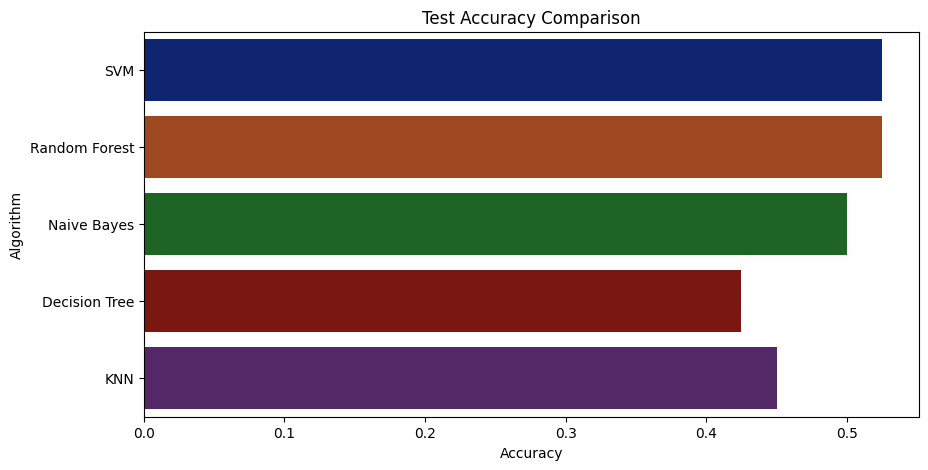

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Test Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')


# Displaying Histogram of Oriented Gradients (HoG)

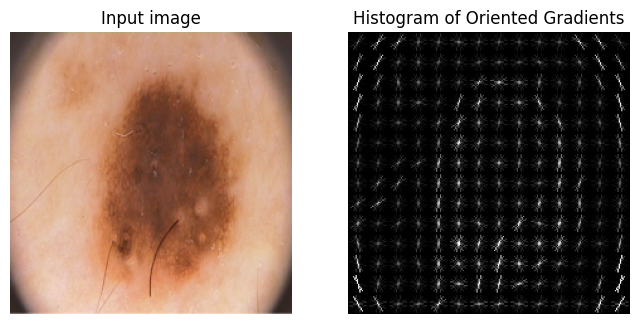

In [145]:


from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread


image = imread('datasets/atypicalNevus/IMD002.png') #replace the path with the path of the image you want the HoG for

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

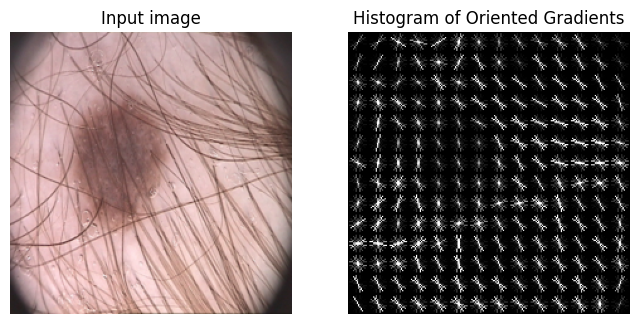

In [146]:

image = imread('datasets/commonNevus/IMD003.png') #replace the path with the path of the image you want the HoG for

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

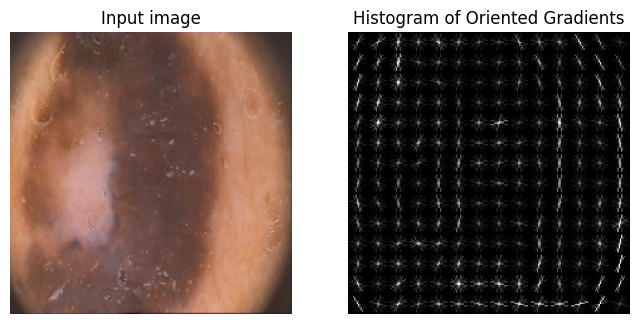

In [147]:

image = imread('datasets/melanoma/IMD058.png') #replace the path with the path of the image you want the HoG for

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()